In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import data_utils_g1 as du
plt.style.use('seaborn')

path = du.open_file_general()
# Reading the dataset
data = pd.read_csv(path)
print("The shape of the dataframe is: ", data.shape)

The shape of the dataframe is:  (19237, 20)


In [2]:
data.describe()

,Unnamed: 0,ID,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
count,19237.0000,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,9618.0000,4.557654e+07,1.855593e+04,632.528669,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,5553.3879,9.365914e+05,1.905813e+05,567.721688,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,0.0000,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4809.0000,4.569837e+07,5.331000e+03,0.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,9618.0000,4.577231e+07,1.317200e+04,642.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,14427.0000,4.580204e+07,2.207500e+04,917.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,19236.0000,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


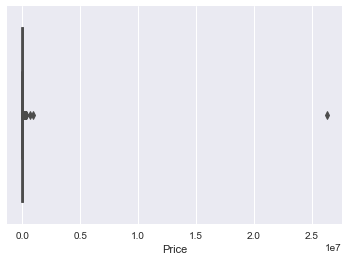

In [3]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Price'])
plt.show()

In [10]:
outlier_free_list=0
filtered_data=0

# Removing the outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
 
 

removeOutliers(data, 'Price')

 
  
# Assigning filtered data back to our original variable
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)

IQR value for column Price is: 15210.0
Shape of data after outlier removal is:  (17761, 20)


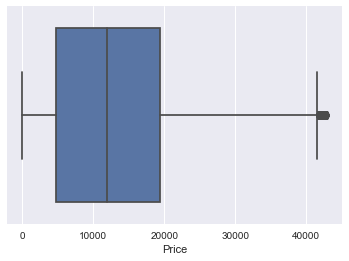

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Price'])
plt.show()

177


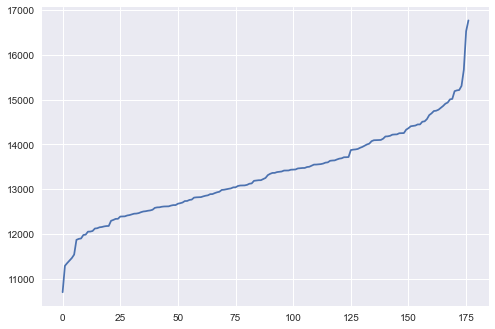

In [12]:
n = 100
a = len(data)
b = int(len(data)/n)
res = []
for i in range(b):
    x=0
    temp = n if a >= i*n+n else a-i*n
    for j in range(temp):
        x+= data.iloc[n*i+j]['Price']
    res.append(int(x/temp))
res.sort()
plt.plot(res)
print(b)

(array([3.91048345e-05, 1.56419338e-04, 3.84530872e-04, 3.32391093e-04,
        1.95524172e-04, 3.25873621e-05, 1.30349448e-05]),
 array([10698.        , 11564.85714286, 12431.71428571, 13298.57142857,
        14165.42857143, 15032.28571429, 15899.14285714, 16766.        ]),
 [<matplotlib.patches.Polygon at 0x28b43b13430>])

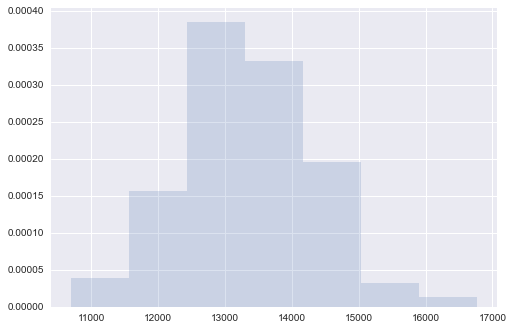

In [13]:
plt.hist(res, bins=7, density=True, histtype='stepfilled',
         alpha=0.2, label='histogram of data')

In [14]:
data

,Unnamed: 0,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,NaN,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,3.0,NaN,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,NaN,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,2.5,NaN,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,NaN,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,Turbo,300000,4,Manual,Rear,2-3,Left wheel,Silver,5
19233,19233,45778856,15681,831,HYUNDAI,SONATA,2011,Sedan,Yes,Petrol,2.4,NaN,161600,4,Tiptronic,Front,4-5,Left wheel,Red,8
19234,19234,45804997,26108,836,HYUNDAI,TUCSON,2010,Jeep,Yes,Diesel,2.0,NaN,116365,4,Automatic,Front,4-5,Left wheel,Grey,4
19235,19235,45793526,5331,1288,CHEVROLET,CAPTIVA,2007,Jeep,Yes,Diesel,2.0,NaN,51258,4,Automatic,Front,4-5,Left wheel,Black,4


In [9]:
data2.to_csv('C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/IQRSanitized.csv',index=False,line_terminator='\n')

NameError: name 'data2' is not defined